# Scenario: 

Liverpool Football Club currently need to sign a midfielder, as the current players are either / both ageing (30+) and  lacking in there ball progression / attacking play from midfield. 


Jude Bellingham is a player Liverpool have been linked to a lot and is highly regarded as one of the best young midfielders in the world. However, Bellingham's asking price is very high and out of the range of Liverpool currently. Therefore, this analysis will be conducted to identify other players how have similar key statistics to Bellingham, who could be alternative transfer targets for Liverpool. 

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

In [2]:
# Import data
stats = pd.read_excel('2022-2023_Player_Stats.xlsx')
stats.head()

Rk             Player Nation   Pos         Squad            Comp  Age  \
0   1   Brenden Aaronson    USA  MFFW  Leeds United  Premier League   22   
1   2   Yunis Abdelhamid    MAR    DF         Reims         Ligue 1   35   
2   3      Himad Abdelli    FRA  MFFW        Angers         Ligue 1   23   
3   4  Salis Abdul Samed    GHA    MF          Lens         Ligue 1   22   
4   5    Laurent Abergel    FRA    MF       Lorient         Ligue 1   30   

   Born  MP  Starts  ...   Off   Crs  TklW  PKwon  PKcon    OG  Recov  AerWon  \
0  2000  20      19  ...  0.17  2.54  0.51    0.0    0.0  0.00   4.86    0.34   
1  1987  22      22  ...  0.05  0.18  1.59    0.0    0.0  0.00   6.64    2.18   
2  1999  14       8  ...  0.00  1.05  1.40    0.0    0.0  0.00   8.14    0.93   
3  2000  20      20  ...  0.00  0.35  0.80    0.0    0.0  0.05   6.60    0.50   
4  1993  15      15  ...  0.00  0.23  2.02    0.0    0.0  0.00   6.51    0.31   

   AerLost  AerWon%  
0     1.19     22.2  
1     1.23     64.0  
2     1.05     47.1  
3     0.50     50.0  
4     0.39     44.4  

[5 rows x 124 columns]

In [3]:
# subset for midfielders
midfield = stats[(stats['Pos'].isin(['MF', 'MFFW']))].reset_index()
midfield.head()

index  Rk             Player Nation   Pos          Squad            Comp  \
0      0   1   Brenden Aaronson    USA  MFFW   Leeds United  Premier League   
1      2   3      Himad Abdelli    FRA  MFFW         Angers         Ligue 1   
2      3   4  Salis Abdul Samed    GHA    MF           Lens         Ligue 1   
3      4   5    Laurent Abergel    FRA    MF        Lorient         Ligue 1   
4      5   6  Oliver Abildgaard    DEN    MF  Hellas Verona         Serie A   

   Age  Born  MP  ...   Off   Crs   TklW  PKwon  PKcon    OG  Recov  AerWon  \
0   22  2000  20  ...  0.17  2.54   0.51    0.0    0.0  0.00   4.86    0.34   
1   23  1999  14  ...  0.00  1.05   1.40    0.0    0.0  0.00   8.14    0.93   
2   22  2000  20  ...  0.00  0.35   0.80    0.0    0.0  0.05   6.60    0.50   
3   30  1993  15  ...  0.00  0.23   2.02    0.0    0.0  0.00   6.51    0.31   
4   26  1996   1  ...  0.00  0.00  10.00    0.0    0.0  0.00  10.00    0.00   

   AerLost  AerWon%  
0     1.19     22.2  
1     1.05     47.1  
2     0.50     50.0  
3     0.39     44.4  
4    10.00      0.0  

[5 rows x 125 columns]

Selected only midfielders and forward midfields which would replicate the needs of Liverpool midfield and reflect Bellingham's playing style. 

In [4]:
# Subsetted further for key midfield stats 
mid_stats = midfield.loc[:, ['Player', 'Age', 'Goals', 'SoT%', 'G/SoT', 'ShoDist', 'PasTotCmp%',
                             'PasTotPrgDist', 'PasShoCmp%', 'PasMedCmp%', 'PasLonCmp%', 'Assists', 
                             'PasAss', 'Pas3rd', 'PPA', 'CrsPA', 'PasProg','PasCrs', 'PasCmp', 'ScaDrib', 
                             'GCA', 'GcaPassLive', 'GcaDrib', 'TklWon','TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 
                             'TklDriPast', 'Int', 'Tkl+Int', 'Clr','TouDef3rd', 'TouMid3rd', 'TouAtt3rd', 
                             'ToSuc%', 'CarPrgDist', 'CarProg', 'Car3rd','CPA', 'AerWon%']].reset_index()

mid_stats

index             Player  Age  Goals  SoT%  G/SoT  ShoDist  PasTotCmp%  \
0        0   Brenden Aaronson   22      1  18.5   0.20     19.0        74.9   
1        1      Himad Abdelli   23      0  33.3   0.00     19.2        80.8   
2        2  Salis Abdul Samed   22      1  25.0   0.33     20.3        91.6   
3        3    Laurent Abergel   30      0   0.0   0.00     23.9        87.3   
4        4  Oliver Abildgaard   26      0   0.0   0.00      0.0        66.7   
..     ...                ...  ...    ...   ...    ...      ...         ...   
811    811   Mart�n Zubimendi   24      1  40.0   0.50     19.1        84.2   
812    812   Szymon ?urkowski   25      0  50.0   0.00     15.2        89.5   
813    813   Szymon ?urkowski   25      0   0.0   0.00      0.0        50.0   
814    814    Martin �degaard   24      8  31.4   0.50     18.9        79.1   
815    815      Filip ?uri?i?   31      2  41.2   0.29     19.4        76.0   

     PasTotPrgDist  PasShoCmp%  ...   Clr  TouDef3rd  TouMid3rd  TouAtt3rd  \
0             85.7        81.9  ...  0.28       4.35       19.0      21.50   
1            188.1        84.1  ...  0.93      11.40       36.0      17.40   
2            226.9        93.2  ...  0.80      12.00       49.6      12.20   
3            224.7        92.4  ...  1.55      19.20       31.4       4.88   
4             90.0       100.0  ...  0.00      20.00       20.0      10.00   
..             ...         ...  ...   ...        ...        ...        ...   
811          251.1        89.0  ...  1.85      16.90       38.5       6.57   
812           52.5        85.7  ...  0.00       2.50       20.0      40.00   
813           30.0        66.7  ...  0.00      20.00       30.0      30.00   
814          181.2        87.4  ...  0.37       5.61       23.7      28.20   
815           94.7        84.2  ...  0.20       5.65       19.6      17.40   

     ToSuc%  CarPrgDist  CarProg  Car3rd   CPA  AerWon%  
0      31.8        56.6     1.53    1.07  0.40     22.2  
1      54.5       151.0     2.56    2.56  0.47     47.1  
2      56.0       117.5     1.25    1.95  0.15     50.0  
3      58.3        72.7     0.47    0.93  0.00     44.4  
4       0.0         0.0     0.00    0.00  0.00      0.0  
..      ...         ...      ...     ...   ...      ...  
811    40.0       107.8     1.12    0.73  0.06     70.9  
812     0.0       150.0     7.50    2.50  2.50     50.0  
813    50.0       240.0    10.00    0.00  0.00      0.0  
814    57.1        83.9     2.78    1.71  0.96     40.9  
815    34.8        68.8     1.77    2.04  0.20     38.1  

[816 rows x 41 columns]

## K-mean Clustering 1: 

Conducted an intial round of k-means clustering to isolate players with similar statistics to Bellingham.

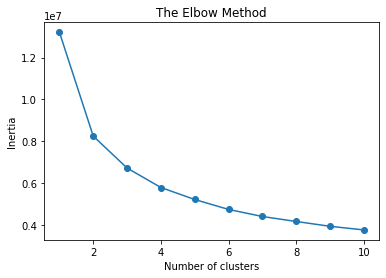

In [5]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
info = mid_stats[['Player', 'Age']]
mid_stats_1 = mid_stats.drop(['index', 'Player', 'Age'], axis=1)
X = mid_stats_1.copy()
scaler = MinMaxScaler()
scaler.fit(X)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
# Plot the elbow method.
plt.plot(range(1, 11),
         inertia,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

plt.show()

Typically we would look to use the number of clusters where the line kinks / at the elbow. However this is either 2 or 3 clusters which would put too many players in each cluster, therefore I have determined using 4 clusters would be optimal. 

In [6]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(X)

clusters = kmeans.labels_
X['K-Means Predicted'] = clusters

In [7]:
# Check the number of observations per predicted class.
X['K-Means Predicted'].value_counts()

3    413
2    253
0    114
1     36
Name: K-Means Predicted, dtype: int64

In [8]:
# print X data
print(X.head())

   Goals  SoT%  G/SoT  ShoDist  PasTotCmp%  PasTotPrgDist  PasShoCmp%  \
0      1  18.5   0.20     19.0        74.9           85.7        81.9   
1      0  33.3   0.00     19.2        80.8          188.1        84.1   
2      1  25.0   0.33     20.3        91.6          226.9        93.2   
3      0   0.0   0.00     23.9        87.3          224.7        92.4   
4      0   0.0   0.00      0.0        66.7           90.0       100.0   

   PasMedCmp%  PasLonCmp%  Assists  ...  TouDef3rd  TouMid3rd  TouAtt3rd  \
0        76.6        38.1     0.11  ...       4.35       19.0      21.50   
1        82.6        74.5     0.00  ...      11.40       36.0      17.40   
2        94.3        77.9     0.00  ...      12.00       49.6      12.20   
3        88.6        66.7     0.08  ...      19.20       31.4       4.88   
4       100.0         0.0     0.00  ...      20.00       20.0      10.00   

   ToSuc%  CarPrgDist  CarProg  Car3rd   CPA  AerWon%  K-Means Predicted  
0    31.8        56.6     1.5

In [9]:
# concat dataframe to include k-means cluster
mid_stats_con = pd.concat([mid_stats, pd.DataFrame(columns=['K-Means Predicted'],
                                                        data=X)],axis=1).drop('index', axis=1)
mid_stats_con

Player  Age  Goals  SoT%  G/SoT  ShoDist  PasTotCmp%  \
0     Brenden Aaronson   22      1  18.5   0.20     19.0        74.9   
1        Himad Abdelli   23      0  33.3   0.00     19.2        80.8   
2    Salis Abdul Samed   22      1  25.0   0.33     20.3        91.6   
3      Laurent Abergel   30      0   0.0   0.00     23.9        87.3   
4    Oliver Abildgaard   26      0   0.0   0.00      0.0        66.7   
..                 ...  ...    ...   ...    ...      ...         ...   
811   Mart�n Zubimendi   24      1  40.0   0.50     19.1        84.2   
812   Szymon ?urkowski   25      0  50.0   0.00     15.2        89.5   
813   Szymon ?urkowski   25      0   0.0   0.00      0.0        50.0   
814    Martin �degaard   24      8  31.4   0.50     18.9        79.1   
815      Filip ?uri?i?   31      2  41.2   0.29     19.4        76.0   

     PasTotPrgDist  PasShoCmp%  PasMedCmp%  ...  TouDef3rd  TouMid3rd  \
0             85.7        81.9        76.6  ...       4.35       19.0   
1            188.1        84.1        82.6  ...      11.40       36.0   
2            226.9        93.2        94.3  ...      12.00       49.6   
3            224.7        92.4        88.6  ...      19.20       31.4   
4             90.0       100.0       100.0  ...      20.00       20.0   
..             ...         ...         ...  ...        ...        ...   
811          251.1        89.0        89.5  ...      16.90       38.5   
812           52.5        85.7       100.0  ...       2.50       20.0   
813           30.0        66.7         0.0  ...      20.00       30.0   
814          181.2        87.4        79.8  ...       5.61       23.7   
815           94.7        84.2        82.8  ...       5.65       19.6   

     TouAtt3rd  ToSuc%  CarPrgDist  CarProg  Car3rd   CPA  AerWon%  \
0        21.50    31.8        56.6     1.53    1.07  0.40     22.2   
1        17.40    54.5       151.0     2.56    2.56  0.47     47.1   
2        12.20    56.0       117.5     1.25    1.95  0.15     50.0   
3         4.88    58.3        72.7     0.47    0.93  0.00     44.4   
4        10.00     0.0         0.0     0.00    0.00  0.00      0.0   
..         ...     ...         ...      ...     ...   ...      ...   
811       6.57    40.0       107.8     1.12    0.73  0.06     70.9   
812      40.00     0.0       150.0     7.50    2.50  2.50     50.0   
813      30.00    50.0       240.0    10.00    0.00  0.00      0.0   
814      28.20    57.1        83.9     2.78    1.71  0.96     40.9   
815      17.40    34.8        68.8     1.77    2.04  0.20     38.1   

     K-Means Predicted  
0                    3  
1                    2  
2                    2  
3                    2  
4                    0  
..                 ...  
811                  2  
812                  3  
813                  0  
814                  3  
815                  3  

[816 rows x 41 columns]

In [10]:
# Find cluster bellingham is in
mid_stats_con.loc[mid_stats_con['Player'] == 'Jude Bellingham']

Player  Age  Goals  SoT%  G/SoT  ShoDist  PasTotCmp%  \
83  Jude Bellingham   19      4  35.9   0.29     16.8        80.9   

    PasTotPrgDist  PasShoCmp%  PasMedCmp%  ...  TouDef3rd  TouMid3rd  \
83          254.6        85.6        86.1  ...       12.0       39.0   

    TouAtt3rd  ToSuc%  CarPrgDist  CarProg  Car3rd  CPA  AerWon%  \
83       21.3    49.5       128.3     3.03    1.97  0.9     56.5   

    K-Means Predicted  
83                  2  

[1 rows x 41 columns]

In [11]:
# Isolate that cluster 
cluster_two = mid_stats_con[mid_stats_con['K-Means Predicted'] == 2].reset_index().drop('index', axis=1)
cluster_two

Player  Age  Goals  SoT%  G/SoT  ShoDist  PasTotCmp%  \
0                 Himad Abdelli   23      0  33.3   0.00     19.2        80.8   
1             Salis Abdul Samed   22      1  25.0   0.33     20.3        91.6   
2               Laurent Abergel   30      0   0.0   0.00     23.9        87.3   
3                   Tyler Adams   23      0   0.0   0.00     29.4        82.0   
4                 Lucien Agoume   21      0   0.0   0.00     12.4        83.1   
..                          ...  ...    ...   ...    ...      ...         ...   
248                        Xeka   28      0   0.0   0.00     22.8        89.4   
249                Yusuf Yaz�c�   26      1  40.0   0.50     19.0        76.0   
250  Andre-Frank Zambo Anguissa   27      2  30.8   0.25     15.5        87.1   
251             Piotr Zieli?ski   28      3  40.0   0.21     22.4        82.7   
252            Mart�n Zubimendi   24      1  40.0   0.50     19.1        84.2   

     PasTotPrgDist  PasShoCmp%  PasMedCmp%  ...  TouDef3rd  TouMid3rd  \
0            188.1        84.1        82.6  ...      11.40       36.0   
1            226.9        93.2        94.3  ...      12.00       49.6   
2            224.7        92.4        88.6  ...      19.20       31.4   
3            220.9        87.9        84.7  ...      15.40       43.2   
4            203.1        87.0        86.8  ...      20.30       36.3   
..             ...         ...         ...  ...        ...        ...   
248          231.0        93.5        90.8  ...      12.10       40.7   
249          204.1        87.2        74.2  ...       6.82       21.8   
250          191.6        92.4        88.8  ...      13.70       41.9   
251          191.8        92.1        81.8  ...       8.36       31.2   
252          251.1        89.0        89.5  ...      16.90       38.5   

     TouAtt3rd  ToSuc%  CarPrgDist  CarProg  Car3rd   CPA  AerWon%  \
0        17.40    54.5       151.0     2.56    2.56  0.47     47.1   
1        12.20    56.0       117.5     1.25    1.95  0.15     50.0   
2         4.88    58.3        72.7     0.47    0.93  0.00     44.4   
3        11.30    17.6        62.5     0.68    1.00  0.00     58.6   
4        13.40    40.0       113.1     1.25    1.88  0.00     83.3   
..         ...     ...         ...      ...     ...   ...      ...   
248      10.00    16.7        91.6     0.82    1.31  0.00     34.8   
249      24.50    16.7       104.5     2.27    2.73  0.00      0.0   
250      21.40    41.9        92.8     1.47    1.47  0.28     65.9   
251      27.20    27.8        93.9     2.47    2.88  0.48     20.0   
252       6.57    40.0       107.8     1.12    0.73  0.06     70.9   

     K-Means Predicted  
0                    2  
1                    2  
2                    2  
3                    2  
4                    2  
..                 ...  
248                  2  
249                  2  
250                  2  
251                  2  
252                  2  

[253 rows x 41 columns]

Can see there are 253 players who are in the similar cluster to Bellingham.

# K-means clustering 2: 

Now we have a inital filter of players with similar statistics to Bellingham, conducted futher K-means clustering on this list of 253 players to find a smaller list similar to Bellingham.

In [12]:
# Drop the k-means column now it has been isolated for future analysis 
cluster_two = cluster_two.drop(['K-Means Predicted'], axis=1)
cluster_two

Player  Age  Goals  SoT%  G/SoT  ShoDist  PasTotCmp%  \
0                 Himad Abdelli   23      0  33.3   0.00     19.2        80.8   
1             Salis Abdul Samed   22      1  25.0   0.33     20.3        91.6   
2               Laurent Abergel   30      0   0.0   0.00     23.9        87.3   
3                   Tyler Adams   23      0   0.0   0.00     29.4        82.0   
4                 Lucien Agoume   21      0   0.0   0.00     12.4        83.1   
..                          ...  ...    ...   ...    ...      ...         ...   
248                        Xeka   28      0   0.0   0.00     22.8        89.4   
249                Yusuf Yaz�c�   26      1  40.0   0.50     19.0        76.0   
250  Andre-Frank Zambo Anguissa   27      2  30.8   0.25     15.5        87.1   
251             Piotr Zieli?ski   28      3  40.0   0.21     22.4        82.7   
252            Mart�n Zubimendi   24      1  40.0   0.50     19.1        84.2   

     PasTotPrgDist  PasShoCmp%  PasMedCmp%  ...   Clr  TouDef3rd  TouMid3rd  \
0            188.1        84.1        82.6  ...  0.93      11.40       36.0   
1            226.9        93.2        94.3  ...  0.80      12.00       49.6   
2            224.7        92.4        88.6  ...  1.55      19.20       31.4   
3            220.9        87.9        84.7  ...  1.16      15.40       43.2   
4            203.1        87.0        86.8  ...  1.25      20.30       36.3   
..             ...         ...         ...  ...   ...        ...        ...   
248          231.0        93.5        90.8  ...  1.31      12.10       40.7   
249          204.1        87.2        74.2  ...  0.45       6.82       21.8   
250          191.6        92.4        88.8  ...  0.96      13.70       41.9   
251          191.8        92.1        81.8  ...  0.34       8.36       31.2   
252          251.1        89.0        89.5  ...  1.85      16.90       38.5   

     TouAtt3rd  ToSuc%  CarPrgDist  CarProg  Car3rd   CPA  AerWon%  
0        17.40    54.5       151.0     2.56    2.56  0.47     47.1  
1        12.20    56.0       117.5     1.25    1.95  0.15     50.0  
2         4.88    58.3        72.7     0.47    0.93  0.00     44.4  
3        11.30    17.6        62.5     0.68    1.00  0.00     58.6  
4        13.40    40.0       113.1     1.25    1.88  0.00     83.3  
..         ...     ...         ...      ...     ...   ...      ...  
248      10.00    16.7        91.6     0.82    1.31  0.00     34.8  
249      24.50    16.7       104.5     2.27    2.73  0.00      0.0  
250      21.40    41.9        92.8     1.47    1.47  0.28     65.9  
251      27.20    27.8        93.9     2.47    2.88  0.48     20.0  
252       6.57    40.0       107.8     1.12    0.73  0.06     70.9  

[253 rows x 40 columns]

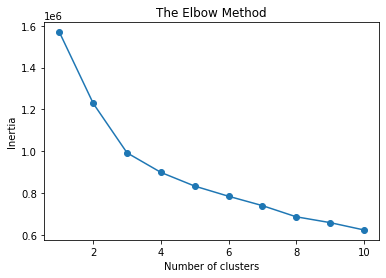

In [13]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
cluster_two_stats = cluster_two.drop(['Player', 'Age'], axis=1)
X_2 = cluster_two_stats.copy()
scaler = MinMaxScaler()
scaler.fit(X_2)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X_2)
    inertia.append(kmeans.inertia_)
    
# Plot the elbow method.
plt.plot(range(1, 11),
         inertia,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

plt.show()

This time, as we have a smaller sample size to begin with we will use 3 clusters where the elbow line kinks

In [14]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 3,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(X_2)

clusters = kmeans.labels_
X_2['K-Means Predicted'] = clusters

In [15]:
# Check the number of observations per predicted class.
X_2['K-Means Predicted'].value_counts()

0    135
1     83
2     35
Name: K-Means Predicted, dtype: int64

In [16]:
# View Dataframe
X_2.head()

Goals  SoT%  G/SoT  ShoDist  PasTotCmp%  PasTotPrgDist  PasShoCmp%  \
0      0  33.3   0.00     19.2        80.8          188.1        84.1   
1      1  25.0   0.33     20.3        91.6          226.9        93.2   
2      0   0.0   0.00     23.9        87.3          224.7        92.4   
3      0   0.0   0.00     29.4        82.0          220.9        87.9   
4      0   0.0   0.00     12.4        83.1          203.1        87.0   

   PasMedCmp%  PasLonCmp%  Assists  ...  TouDef3rd  TouMid3rd  TouAtt3rd  \
0        82.6        74.5     0.00  ...       11.4       36.0      17.40   
1        94.3        77.9     0.00  ...       12.0       49.6      12.20   
2        88.6        66.7     0.08  ...       19.2       31.4       4.88   
3        84.7        60.0     0.00  ...       15.4       43.2      11.30   
4        86.8        71.4     0.00  ...       20.3       36.3      13.40   

   ToSuc%  CarPrgDist  CarProg  Car3rd   CPA  AerWon%  K-Means Predicted  
0    54.5       151.0     2.56    2.56  0.47     47.1                  2  
1    56.0       117.5     1.25    1.95  0.15     50.0                  0  
2    58.3        72.7     0.47    0.93  0.00     44.4                  0  
3    17.6        62.5     0.68    1.00  0.00     58.6                  0  
4    40.0       113.1     1.25    1.88  0.00     83.3                  0  

[5 rows x 39 columns]

In [17]:
# Create a new df concat from reviews_clean and x
two_con = pd.concat([cluster_two, pd.DataFrame(columns=['K-Means Predicted'],
                                                        data=X_2)],axis=1)
two_con

Player  Age  Goals  SoT%  G/SoT  ShoDist  PasTotCmp%  \
0                 Himad Abdelli   23      0  33.3   0.00     19.2        80.8   
1             Salis Abdul Samed   22      1  25.0   0.33     20.3        91.6   
2               Laurent Abergel   30      0   0.0   0.00     23.9        87.3   
3                   Tyler Adams   23      0   0.0   0.00     29.4        82.0   
4                 Lucien Agoume   21      0   0.0   0.00     12.4        83.1   
..                          ...  ...    ...   ...    ...      ...         ...   
248                        Xeka   28      0   0.0   0.00     22.8        89.4   
249                Yusuf Yaz�c�   26      1  40.0   0.50     19.0        76.0   
250  Andre-Frank Zambo Anguissa   27      2  30.8   0.25     15.5        87.1   
251             Piotr Zieli?ski   28      3  40.0   0.21     22.4        82.7   
252            Mart�n Zubimendi   24      1  40.0   0.50     19.1        84.2   

     PasTotPrgDist  PasShoCmp%  PasMedCmp%  ...  TouDef3rd  TouMid3rd  \
0            188.1        84.1        82.6  ...      11.40       36.0   
1            226.9        93.2        94.3  ...      12.00       49.6   
2            224.7        92.4        88.6  ...      19.20       31.4   
3            220.9        87.9        84.7  ...      15.40       43.2   
4            203.1        87.0        86.8  ...      20.30       36.3   
..             ...         ...         ...  ...        ...        ...   
248          231.0        93.5        90.8  ...      12.10       40.7   
249          204.1        87.2        74.2  ...       6.82       21.8   
250          191.6        92.4        88.8  ...      13.70       41.9   
251          191.8        92.1        81.8  ...       8.36       31.2   
252          251.1        89.0        89.5  ...      16.90       38.5   

     TouAtt3rd  ToSuc%  CarPrgDist  CarProg  Car3rd   CPA  AerWon%  \
0        17.40    54.5       151.0     2.56    2.56  0.47     47.1   
1        12.20    56.0       117.5     1.25    1.95  0.15     50.0   
2         4.88    58.3        72.7     0.47    0.93  0.00     44.4   
3        11.30    17.6        62.5     0.68    1.00  0.00     58.6   
4        13.40    40.0       113.1     1.25    1.88  0.00     83.3   
..         ...     ...         ...      ...     ...   ...      ...   
248      10.00    16.7        91.6     0.82    1.31  0.00     34.8   
249      24.50    16.7       104.5     2.27    2.73  0.00      0.0   
250      21.40    41.9        92.8     1.47    1.47  0.28     65.9   
251      27.20    27.8        93.9     2.47    2.88  0.48     20.0   
252       6.57    40.0       107.8     1.12    0.73  0.06     70.9   

     K-Means Predicted  
0                    2  
1                    0  
2                    0  
3                    0  
4                    0  
..                 ...  
248                  0  
249                  0  
250                  0  
251                  0  
252                  1  

[253 rows x 41 columns]

In [18]:
# view column names to ensure concat has been achieved successfully
two_con.columns

Index(['Player', 'Age', 'Goals', 'SoT%', 'G/SoT', 'ShoDist', 'PasTotCmp%',
       'PasTotPrgDist', 'PasShoCmp%', 'PasMedCmp%', 'PasLonCmp%', 'Assists',
       'PasAss', 'Pas3rd', 'PPA', 'CrsPA', 'PasProg', 'PasCrs', 'PasCmp',
       'ScaDrib', 'GCA', 'GcaPassLive', 'GcaDrib', 'TklWon', 'TklDef3rd',
       'TklMid3rd', 'TklAtt3rd', 'TklDriPast', 'Int', 'Tkl+Int', 'Clr',
       'TouDef3rd', 'TouMid3rd', 'TouAtt3rd', 'ToSuc%', 'CarPrgDist',
       'CarProg', 'Car3rd', 'CPA', 'AerWon%', 'K-Means Predicted'],
      dtype='object')

In [19]:
# Find cluster bellingham is in
two_con.loc[two_con['Player'] == 'Jude Bellingham']

Player  Age  Goals  SoT%  G/SoT  ShoDist  PasTotCmp%  \
30  Jude Bellingham   19      4  35.9   0.29     16.8        80.9   

    PasTotPrgDist  PasShoCmp%  PasMedCmp%  ...  TouDef3rd  TouMid3rd  \
30          254.6        85.6        86.1  ...       12.0       39.0   

    TouAtt3rd  ToSuc%  CarPrgDist  CarProg  Car3rd  CPA  AerWon%  \
30       21.3    49.5       128.3     3.03    1.97  0.9     56.5   

    K-Means Predicted  
30                  1  

[1 rows x 41 columns]

In [20]:
# Isolate that cluster 
jude_cluster = two_con[two_con['K-Means Predicted'] == 1].reset_index().drop(['index'], axis=1)
jude_cluster

Player  Age  Goals  SoT%  G/SoT  ShoDist  PasTotCmp%  \
0         �lvaro Aguado   26      0  22.2   0.00     25.4        83.0   
1          Luis Alberto   30      4  41.2   0.43     22.3        80.0   
2        Benjamin Andr�   32      1  13.3   0.50     16.2        84.3   
3     Maximilian Arnold   28      4  35.0   0.29     32.2        74.2   
4    Santiago Ascac�bar   25      0  21.4   0.00     27.2        82.3   
..                  ...  ...    ...   ...    ...      ...         ...   
78      Youri Tielemans   25      3  31.8   0.29     27.6        82.3   
79  Unai Vencedor Paris   22      0  33.3   0.00     16.3        89.0   
80      Jordan Veretout   29      3  43.8   0.43     18.4        85.3   
81          Harry Winks   27      0   0.0   0.00     23.5        78.7   
82     Mart�n Zubimendi   24      1  40.0   0.50     19.1        84.2   

    PasTotPrgDist  PasShoCmp%  PasMedCmp%  ...  TouDef3rd  TouMid3rd  \
0           248.3        88.3        87.5  ...      12.90       34.1   
1           302.9        90.2        83.9  ...       9.32       42.1   
2           329.4        88.0        88.4  ...      19.20       52.5   
3           288.4        86.4        84.5  ...      14.80       34.1   
4           270.2        87.9        93.1  ...      22.00       34.6   
..            ...         ...         ...  ...        ...        ...   
78          302.0        89.8        86.4  ...      17.20       43.4   
79          261.3        94.9        87.1  ...      10.00       42.5   
80          308.5        89.6        89.3  ...      12.90       47.6   
81          334.5        89.2        88.9  ...      15.80       39.7   
82          251.1        89.0        89.5  ...      16.90       38.5   

    TouAtt3rd  ToSuc%  CarPrgDist  CarProg  Car3rd   CPA  AerWon%  \
0       13.60    46.2       102.4     1.35    1.90  0.08     48.0   
1       24.00    16.7       106.8     2.82    2.74  0.43     30.0   
2       10.80    59.1       121.5     1.13    1.23  0.00     61.9   
3       12.60    45.5        62.2     0.57    0.63  0.05     48.7   
4       12.30    44.4        54.6     0.12    0.37  0.00     33.3   
..        ...     ...         ...      ...     ...   ...      ...   
78      15.90    63.2        84.0     1.37    0.98  0.05     68.0   
79      15.00     0.0        73.1     0.63    1.25  0.63    100.0   
80      15.70    75.0       159.5     1.67    1.73  0.18     44.0   
81      12.10    33.3        73.0     0.91    1.21  0.00      0.0   
82       6.57    40.0       107.8     1.12    0.73  0.06     70.9   

    K-Means Predicted  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
..                ...  
78                  1  
79                  1  
80                  1  
81                  1  
82                  1  

[83 rows x 41 columns]

In [21]:
# find age range of the dataframe
print(jude_cluster['Age'].min())
jude_cluster['Age'].max()

17


37

In [22]:
# view the number of players in each age bracket
jude_cluster['Age'].value_counts()

29    12
25    10
27     8
28     7
26     6
30     6
24     4
34     4
33     3
21     3
31     3
23     3
22     3
32     3
19     2
35     2
20     2
17     1
37     1
Name: Age, dtype: int64

Need to target players who are young and will provide 4+ years of first team football but are also coming into their best years and can be trusted to play first team football. 

Bellingham is 19 years old and probably at the bottom of this range, being as good as he is at this age is an outlier generally in football. 

Look to target players between the ages of 19 and 26. At the top end of this range they will be reaching 30 after four years, generally when most players experience a downturn in their career. 

In [23]:
# Isolate players based on ideal range
target_age = jude_cluster[(jude_cluster.Age >= 19) & (jude_cluster.Age <= 26)]
target_age

Player  Age  Goals  SoT%  G/SoT  ShoDist  PasTotCmp%  \
0           �lvaro Aguado   26      0  22.2   0.00     25.4        83.0   
4      Santiago Ascac�bar   25      0  21.4   0.00     27.2        82.3   
5           Pablo Barrios   19      0  40.0   0.00     22.9        84.8   
7         Jude Bellingham   19      4  35.9   0.29     16.8        80.9   
8         Isma�l Bennacer   25      1  28.6   0.50     27.6        86.2   
13         Mohamed Camara   23      0  31.3   0.00     28.7        87.5   
15       Maxence Caqueret   22      1  43.8   0.14     21.0        84.2   
20       Pedro Chirivella   25      0  35.7   0.00     21.9        85.6   
21  Alessandro Cortinovis   22      0   0.0   0.00      0.0        83.3   
29           Aleix Garc�a   25      0  44.0   0.00     23.9        84.0   
30          Billy Gilmour   21      0   0.0   0.00     17.1        92.2   
34       Nicol�s Gonz�lez   21      1  22.2   0.50     16.6        89.5   
35          Ander Guevara   25      0   0.0   0.00     23.7        90.0   
41       Teun Koopmeiners   24      6  40.5   0.27     22.8        74.5   
44            Enzo Le F�e   23      4  55.2   0.25     23.9        79.6   
47           Maxime Lopez   25      0  33.3   0.00     25.1        87.3   
51           R?zvan Marin   26      2  33.3   0.29     26.9        80.6   
52         Yanis Massolin   20      0   0.0   0.00      0.0        78.4   
54          Azor Matusiwa   24      0  40.0   0.00     26.6        84.3   
58            R�ben Neves   25      5  20.0   0.38     27.0        82.6   
59          Lucas Paquet�   25      0  20.0   0.00     15.1        87.3   
61         Matteo Pessina   25      3  25.0   0.25     20.2        84.9   
64            Declan Rice   24      1  16.0   0.25     24.9        87.8   
65              Marc Roca   26      1  40.0   0.17     21.8        76.8   
67         Nicol� Rovella   21      0  11.1   0.00     27.0        88.2   
68       Fabi�n Ruiz Pe�a   26      1  15.4   0.50     19.0        91.6   
69            Hamza Sakhi   26      1  28.6   0.13     23.7        80.1   
73        Stijn Spierings   26      2  16.7   0.67     20.5        84.6   
75           Waniss Taibi   20      0   0.0   0.00      6.5        88.9   
77    Aur�lien Tchouam�ni   23      0  11.8   0.00     21.7        92.9   
78        Youri Tielemans   25      3  31.8   0.29     27.6        82.3   
79    Unai Vencedor Paris   22      0  33.3   0.00     16.3        89.0   
82       Mart�n Zubimendi   24      1  40.0   0.50     19.1        84.2   

    PasTotPrgDist  PasShoCmp%  PasMedCmp%  ...  TouDef3rd  TouMid3rd  \
0           248.3        88.3        87.5  ...      12.90       34.1   
4           270.2        87.9        93.1  ...      22.00       34.6   
5           244.7        89.4        86.3  ...      13.70       44.0   
7           254.6        85.6        86.1  ...      12.00       39.0   
8           283.6        92.8        91.4  ...      14.40       47.8   
13          258.1        91.7        90.4  ...      14.20       43.4   
15          250.6        87.4        90.0  ...      10.30       39.4   
20          278.1        92.8        89.1  ...      10.00       48.0   
21          350.0       100.0       100.0  ...      30.00        0.0   
29          305.7        93.8        90.3  ...      14.80       39.7   
30          288.9        94.0        95.5  ...      22.20       56.1   
34          251.7        93.3        92.3  ...      12.30       42.0   
35          252.7        98.3        91.5  ...       8.00       54.7   
41          307.2        86.7        80.0  ...      16.90       29.2   
44          282.0        88.0        83.1  ...      15.80       41.5   
47          333.6        92.2        87.3  ...      17.30       41.0   
51          280.2        95.9        83.7  ...      17.30       32.7   
52          276.0        83.3        80.0  ...      32.00       50.0   
54          283.4        84.8        90.0  ...      19.50       37.5   
58          299.1        89.

Now working with 33 players - this could be used as longer transfer list of 33 targets. However, ideally I want to reduce this list down to less than ten key targets. 

One of Bellingham's key strengths and a weakness of Liverpool current side is the lack of drive in the midfield and progressing the ball forward. 

Bellingham is not a defensive midfielder, hence MFDF was not included in the original midfield subset, so I wanted to focus on what I felt are the key stats about progressing the ball and creativity.

# Finding Transfer Targets:

In [24]:
# Isolate progressive / creativity stats 
key_mid = target_age.loc[:, ['Player', 'Age', 'SoT%', 'PasTotCmp%','PasTotPrgDist', 'Assists', 'PasProg', 'ScaDrib', 
                             'GCA', 'TklMid3rd', 'ToSuc%', 'CarPrgDist']].reset_index().drop(['index'], axis=1)


key_mid

Player  Age  SoT%  PasTotCmp%  PasTotPrgDist  Assists  \
0           �lvaro Aguado   26  22.2        83.0          248.3     0.16   
1      Santiago Ascac�bar   25  21.4        82.3          270.2     0.00   
2           Pablo Barrios   19  40.0        84.8          244.7     0.00   
3         Jude Bellingham   19  35.9        80.9          254.6     0.21   
4         Isma�l Bennacer   25  28.6        86.2          283.6     0.06   
5          Mohamed Camara   23  31.3        87.5          258.1     0.13   
6        Maxence Caqueret   22  43.8        84.2          250.6     0.18   
7        Pedro Chirivella   25  35.7        85.6          278.1     0.06   
8   Alessandro Cortinovis   22   0.0        83.3          350.0     0.00   
9            Aleix Garc�a   25  44.0        84.0          305.7     0.20   
10          Billy Gilmour   21   0.0        92.2          288.9     0.00   
11       Nicol�s Gonz�lez   21  22.2        89.5          251.7     0.00   
12          Ander Guevara   25   0.0        90.0          252.7     0.00   
13       Teun Koopmeiners   24  40.5        74.5          307.2     0.15   
14            Enzo Le F�e   23  55.2        79.6          282.0     0.23   
15           Maxime Lopez   25  33.3        87.3          333.6     0.00   
16           R?zvan Marin   26  33.3        80.6          280.2     0.12   
17         Yanis Massolin   20   0.0        78.4          276.0     0.00   
18          Azor Matusiwa   24  40.0        84.3          283.4     0.00   
19            R�ben Neves   25  20.0        82.6          299.1     0.00   
20          Lucas Paquet�   25  20.0        87.3          297.8     0.00   
21         Matteo Pessina   25  25.0        84.9          236.0     0.12   
22            Declan Rice   24  16.0        87.8          263.8     0.05   
23              Marc Roca   26  40.0        76.8          267.9     0.06   
24         Nicol� Rovella   21  11.1        88.2          315.8     0.00   
25       Fabi�n Ruiz Pe�a   26  15.4        91.6          276.1     0.10   
26            Hamza Sakhi   26  28.6        80.1          241.1     0.11   
27        Stijn Spierings   26  16.7        84.6          288.8     0.00   
28           Waniss Taibi   20   0.0        88.9          263.7     0.53   
29    Aur�lien Tchouam�ni   23  11.8        92.9          321.5     0.17   
30        Youri Tielemans   25  31.8        82.3          302.0     0.05   
31    Unai Vencedor Paris   22  33.3        89.0          261.3     0.00   
32       Mart�n Zubimendi   24  40.0        84.2          251.1     0.11   

    PasProg  ScaDrib   GCA  TklMid3rd  ToSuc%  CarPrgDist  
0      6.51     0.00  0.32       0.32    46.2       102.4  
1      5.06     0.00  0.37       1.23    44.4        54.6  
2      7.33     0.00  0.00       2.00    33.3        96.3  
3      9.04     0.32  0.53       1.28    49.5       128.3  
4      6.31     0.06  0.13       1.53    50.0        93.9  
5      5.19     0.06  0.45       1.75    41.9       117.4  
6      7.06     0.31  0.49       1.35    36.4        99.7  
7      7.46     0.11  0.11       0.62    54.5       108.4  
8     20.00     0.00  0.00       0.00     0.0        40.0  
9      5.62     0.10  0.54       0.64    44.4        82.9  
10     9.44     0.00  0.56       0.56     0.0       155.6  
11     6.97     0.00  0.00       0.76    70.6        94.5  
12     6.00     0.00  0.00       0.67   100.0       126.0  
13     6.08     0.00  0.64       0.78    45.2        90.8  
14     6.68     0.14  0.47       1.36    41.9       157.1  
15     8.39     0.00  0.16       0.56    26.7       121.0  
16     4.13     0.00  0.12       0.78    50.0        85.1  
17     8.00     0.00  0.00       0.00     0.0       122.0  
18     7.03     0.00  0.14       1.08    45.5        98.5  
19     5.90     0.10  0.10       0.90    46.7        81.3  
20     4.44     0.56  0.56       2.78    33.3       112.8  
21     6.71     0.00  0.35       0.53    62.1       117.6  
22     7.09     0.05  0.14       1.14    50.0       13

In [25]:
# Find mean of the key_mid dataframe
key_mid.mean()

/var/folders/bj/w3dhznpj2zvgyf7ttkqmwy580000gn/T/ipykernel_3760/2928408070.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  key_mid.mean()


Age               23.575758
SoT%              25.366667
PasTotCmp%        84.830303
PasTotPrgDist    278.351515
Assists            0.084848
PasProg            7.041515
ScaDrib            0.062727
GCA                0.245152
TklMid3rd          1.093939
ToSuc%            43.557576
CarPrgDist       108.321212
dtype: float64

Half the mean which will subtract and add to bellingham stats to create the original lower and upper limits. This will be the original figures to see which targets is produces

In [26]:
# half the mean  
half_mean = pd.DataFrame(key_mid.mean()/2)
half_mean

/var/folders/bj/w3dhznpj2zvgyf7ttkqmwy580000gn/T/ipykernel_3760/3806190183.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  half_mean = pd.DataFrame(key_mid.mean()/2)


0
Age             11.787879
SoT%            12.683333
PasTotCmp%      42.415152
PasTotPrgDist  139.175758
Assists          0.042424
PasProg          3.520758
ScaDrib          0.031364
GCA              0.122576
TklMid3rd        0.546970
ToSuc%          21.778788
CarPrgDist      54.160606

In [27]:
# transpose the half mean
half_mean_t = half_mean.T
half_mean_t

Age       SoT%  PasTotCmp%  PasTotPrgDist   Assists   PasProg  \
0  11.787879  12.683333   42.415152     139.175758  0.042424  3.520758   

    ScaDrib       GCA  TklMid3rd     ToSuc%  CarPrgDist  
0  0.031364  0.122576    0.54697  21.778788   54.160606

In [28]:
# Reproduce bellingham stats
bellingham = key_mid.loc[key_mid['Player'] == 'Jude Bellingham']
bellingham

Player  Age  SoT%  PasTotCmp%  PasTotPrgDist  Assists  PasProg  \
3  Jude Bellingham   19  35.9        80.9          254.6     0.21     9.04   

   ScaDrib   GCA  TklMid3rd  ToSuc%  CarPrgDist  
3     0.32  0.53       1.28    49.5       128.3

In [29]:
# keep key bellingham stats
bellingham_stats = bellingham.drop(['Player'], axis=1).reset_index().drop(['index'], axis=1)
bellingham_stats

Age  SoT%  PasTotCmp%  PasTotPrgDist  Assists  PasProg  ScaDrib   GCA  \
0   19  35.9        80.9          254.6     0.21     9.04     0.32  0.53   

   TklMid3rd  ToSuc%  CarPrgDist  
0       1.28    49.5       128.3

In [30]:
# calculate lower level 
# sub half mean from bellingham stats
bellingham_stats.sub(half_mean_t, axis=0)

Age       SoT%  PasTotCmp%  PasTotPrgDist   Assists   PasProg  \
0  7.212121  23.216667   38.484848     115.424242  0.167576  5.519242   

    ScaDrib       GCA  TklMid3rd     ToSuc%  CarPrgDist  
0  0.288636  0.407424    0.73303  27.721212   74.139394

In [31]:
# calculate upper level 
# add half mean to bellingham stats
bellingham_stats.add(half_mean_t, axis=0)

Age       SoT%  PasTotCmp%  PasTotPrgDist   Assists    PasProg  \
0  30.787879  48.583333  123.315152     393.775758  0.252424  12.560758   

    ScaDrib       GCA  TklMid3rd     ToSuc%  CarPrgDist  
0  0.351364  0.652576    1.82697  71.278788  182.460606

In [32]:
# Set range of each stat to find targets 
key_mid[(key_mid['SoT%'] >= 23.216667) & (key_mid['SoT%'] <= 48.583333) &
       (key_mid['PasTotCmp%'] >= 38.484848) & (key_mid['PasTotCmp%'] <= 123.315152) &
       (key_mid['PasTotPrgDist'] >= 115.424242) & (key_mid['PasTotPrgDist'] <= 393.775758) &
       (key_mid['Assists'] >= 0.167576) & (key_mid['Assists'] <= 0.252424) &
       (key_mid['PasProg'] >= 5.519242) & (key_mid['PasProg'] <= 12.560758) &
       (key_mid['ScaDrib'] >= 0.288636) & (key_mid['ScaDrib'] <= 0.351364) &
       (key_mid['GCA'] >= 0.407424) & (key_mid['GCA'] <= 0.652576) &
       (key_mid['TklMid3rd'] >= 0.73303) & (key_mid['TklMid3rd'] <= 1.82697) &
       (key_mid['ToSuc%'] >= 27.721212) & (key_mid['ToSuc%'] <= 71.278788) &
       (key_mid['CarPrgDist'] >= 74.139394) & (key_mid['CarPrgDist'] <= 182.460606)]

Player  Age  SoT%  PasTotCmp%  PasTotPrgDist  Assists  PasProg  \
3   Jude Bellingham   19  35.9        80.9          254.6     0.21     9.04   
6  Maxence Caqueret   22  43.8        84.2          250.6     0.18     7.06   

   ScaDrib   GCA  TklMid3rd  ToSuc%  CarPrgDist  
3     0.32  0.53       1.28    49.5       128.3  
6     0.31  0.49       1.35    36.4        99.7

In [64]:
# Set range of each stat to find targets 
first_list =  key_mid[(key_mid['SoT%'] >= 23.216667) & (key_mid['SoT%'] <= 48.583333) &
       (key_mid['PasTotCmp%'] >= 38.484848) & (key_mid['PasTotCmp%'] <= 123.315152) &
       (key_mid['PasTotPrgDist'] >= 115.424242) & (key_mid['PasTotPrgDist'] <= 393.775758) &
       (key_mid['Assists'] >= 0.167576) & (key_mid['Assists'] <= 0.252424) &
       (key_mid['PasProg'] >= 5.519242) & (key_mid['PasProg'] <= 12.560758) &
       (key_mid['ScaDrib'] >= 0.288636) & (key_mid['ScaDrib'] <= 0.351364) &
       (key_mid['GCA'] >= 0.407424) & (key_mid['GCA'] <= 0.652576) &
       (key_mid['TklMid3rd'] >= 0.73303) & (key_mid['TklMid3rd'] <= 1.82697) &
       (key_mid['ToSuc%'] >= 27.721212) & (key_mid['ToSuc%'] <= 71.278788) &
       (key_mid['CarPrgDist'] >= 74.139394) & (key_mid['CarPrgDist'] <= 182.460606)]

first_list

Player  Age  SoT%  PasTotCmp%  PasTotPrgDist  Assists  PasProg  \
3   Jude Bellingham   19  35.9        80.9          254.6     0.21     9.04   
6  Maxence Caqueret   22  43.8        84.2          250.6     0.18     7.06   

   ScaDrib   GCA  TklMid3rd  ToSuc%  CarPrgDist  
3     0.32  0.53       1.28    49.5       128.3  
6     0.31  0.49       1.35    36.4        99.7

Only produced one other player besides Bellingham. This can be viewed one of two ways; we have one ideal candidate that is close to Bellingham, however it isn't ideal to be placing all our eggs in one basket so it would be good to identify other candidates.

Decided to calculate the quarter mean to subtract / add to the lower and upper limits to widen the range and see if it provides other candidates

In [33]:
# calculate the quarter mean
quarter_mean = pd.DataFrame(key_mid.mean()/4)
quarter_mean

/var/folders/bj/w3dhznpj2zvgyf7ttkqmwy580000gn/T/ipykernel_3760/3833468669.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  quarter_mean = pd.DataFrame(key_mid.mean()/4)


0
Age             5.893939
SoT%            6.341667
PasTotCmp%     21.207576
PasTotPrgDist  69.587879
Assists         0.021212
PasProg         1.760379
ScaDrib         0.015682
GCA             0.061288
TklMid3rd       0.273485
ToSuc%         10.889394
CarPrgDist     27.080303

In [34]:
# transpose quarter mean
quarter_mean_t = quarter_mean.T
quarter_mean_t

Age      SoT%  PasTotCmp%  PasTotPrgDist   Assists   PasProg  \
0  5.893939  6.341667   21.207576      69.587879  0.021212  1.760379   

    ScaDrib       GCA  TklMid3rd     ToSuc%  CarPrgDist  
0  0.015682  0.061288   0.273485  10.889394   27.080303

In [35]:
# add new lower and upper limits
key_mid[(key_mid['SoT%'] >= (23.216667 - 6.341667)) & (key_mid['SoT%'] <= (48.583333 + 6.341667)) &
       (key_mid['PasTotCmp%'] >= (38.484848 - 21.207576)) & (key_mid['PasTotCmp%'] <= (123.315152 + 21.207576)) &
       (key_mid['PasTotPrgDist'] >= (115.424242 - 69.587879)) & (key_mid['PasTotPrgDist'] <= (393.775758 + 69.587879)) &
       (key_mid['Assists'] >= (0.167576 - 0.021212)) & (key_mid['Assists'] <= (0.252424 + 0.021212)) &
       (key_mid['PasProg'] >= (5.519242 - 1.760379)) & (key_mid['PasProg'] <= (12.560758 + 1.760379)) &
       (key_mid['ScaDrib'] >= (0.288636 - 0.015682)) & (key_mid['ScaDrib'] <= (0.351364 + 0.015682)) &
       (key_mid['GCA'] >= (0.407424 - 0.061288)) & (key_mid['GCA'] <= (0.652576 + 0.061288)) &
       (key_mid['TklMid3rd'] >= (0.73303 - 0.273485)) & (key_mid['TklMid3rd'] <= (1.82697 + 0.273485)) &
       (key_mid['ToSuc%'] >= (27.721212 - 10.889394)) & (key_mid['ToSuc%'] <= (71.278788 + 10.889394)) &
       (key_mid['CarPrgDist'] >= (74.139394 - 27.080303)) & (key_mid['CarPrgDist'] <= (182.460606 + 27.080303))]

Player  Age  SoT%  PasTotCmp%  PasTotPrgDist  Assists  PasProg  \
3   Jude Bellingham   19  35.9        80.9          254.6     0.21     9.04   
6  Maxence Caqueret   22  43.8        84.2          250.6     0.18     7.06   

   ScaDrib   GCA  TklMid3rd  ToSuc%  CarPrgDist  
3     0.32  0.53       1.28    49.5       128.3  
6     0.31  0.49       1.35    36.4        99.7

Still only produced the same player as before, need to have a look at widening the range

In [36]:
# Find the mean
mean_mid = pd.DataFrame(key_mid.mean())
mean_mid

/var/folders/bj/w3dhznpj2zvgyf7ttkqmwy580000gn/T/ipykernel_3760/2734657284.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_mid = pd.DataFrame(key_mid.mean())


0
Age             23.575758
SoT%            25.366667
PasTotCmp%      84.830303
PasTotPrgDist  278.351515
Assists          0.084848
PasProg          7.041515
ScaDrib          0.062727
GCA              0.245152
TklMid3rd        1.093939
ToSuc%          43.557576
CarPrgDist     108.321212

In [37]:
# transpose the meana
mean_mid_t = mean_mid.T
mean_mid_t

Age       SoT%  PasTotCmp%  PasTotPrgDist   Assists   PasProg  \
0  23.575758  25.366667   84.830303     278.351515  0.084848  7.041515   

    ScaDrib       GCA  TklMid3rd     ToSuc%  CarPrgDist  
0  0.062727  0.245152   1.093939  43.557576  108.321212

In [38]:
# subtract the mean from bellingham
bellingham_stats.sub(mean_mid_t, axis=0)

Age       SoT%  PasTotCmp%  PasTotPrgDist   Assists   PasProg  \
0 -4.575758  10.533333   -3.930303     -23.751515  0.125152  1.998485   

    ScaDrib       GCA  TklMid3rd    ToSuc%  CarPrgDist  
0  0.257273  0.284848   0.186061  5.942424   19.978788

In [39]:
# add mean to bellingham
bellingham_stats.add(mean_mid_t, axis=0)

Age       SoT%  PasTotCmp%  PasTotPrgDist   Assists    PasProg  \
0  42.575758  61.266667  165.730303     532.951515  0.294848  16.081515   

    ScaDrib       GCA  TklMid3rd     ToSuc%  CarPrgDist  
0  0.382727  0.775152   2.373939  93.057576  236.621212

In [40]:
# use new lower and upper limits
key_mid[(key_mid['SoT%'] >= 10.533333) & (key_mid['SoT%'] <= 61.266667) &
       (key_mid['PasTotCmp%'] >= (-3.930303)) & (key_mid['PasTotCmp%'] <= 165.730303) &
       (key_mid['PasTotPrgDist'] >= -23.751515) & (key_mid['PasTotPrgDist'] <= 532.951515) &
       (key_mid['Assists'] >= 0.125152) & (key_mid['Assists'] <= 0.294848) &
       (key_mid['PasProg'] >= 1.998485) & (key_mid['PasProg'] <= 16.081515) &
       (key_mid['ScaDrib'] >= 0.257273) & (key_mid['ScaDrib'] <= 0.382727) &
       (key_mid['GCA'] >= 0.284848) & (key_mid['GCA'] <= 0.775152) &
       (key_mid['TklMid3rd'] >= 0.186061) & (key_mid['TklMid3rd'] <= 2.373939) &
       (key_mid['ToSuc%'] >= 5.942424) & (key_mid['ToSuc%'] <= 93.057576) &
       (key_mid['CarPrgDist'] >= 19.978788) & (key_mid['CarPrgDist'] <= 236.621212)]

Player  Age  SoT%  PasTotCmp%  PasTotPrgDist  Assists  PasProg  \
3   Jude Bellingham   19  35.9        80.9          254.6     0.21     9.04   
6  Maxence Caqueret   22  43.8        84.2          250.6     0.18     7.06   

   ScaDrib   GCA  TklMid3rd  ToSuc%  CarPrgDist  
3     0.32  0.53       1.28    49.5       128.3  
6     0.31  0.49       1.35    36.4        99.7

In [41]:
# try another way of using the range to check if the code was wrong 
key_mid.loc[
    ((key_mid['SoT%'].between(23.216667, 48.583333)) &
    (key_mid['PasTotCmp%'].between(38.484848, 123.315152))&
    (key_mid['PasTotPrgDist'].between(115.424242, 393.775758))&
    (key_mid['Assists'].between(0.167576, 0.252424))&
    (key_mid['PasProg'].between(5.519242, 12.560758))&
    (key_mid['ScaDrib'].between(0.288636, 0.351364))&
    (key_mid['GCA'].between(0.407424, 0.652576))&
    (key_mid['TklMid3rd'].between(0.73303, 1.82697))&
    (key_mid['ToSuc%'].between(27.721212, 71.278788))&
    (key_mid['CarPrgDist'].between(74.139394, 182.460606)))
]

Player  Age  SoT%  PasTotCmp%  PasTotPrgDist  Assists  PasProg  \
3   Jude Bellingham   19  35.9        80.9          254.6     0.21     9.04   
6  Maxence Caqueret   22  43.8        84.2          250.6     0.18     7.06   

   ScaDrib   GCA  TklMid3rd  ToSuc%  CarPrgDist  
3     0.32  0.53       1.28    49.5       128.3  
6     0.31  0.49       1.35    36.4        99.7

In [42]:
# View all the stats 
# Shows the upper and lower limits
key_mid.describe()

Age       SoT%  PasTotCmp%  PasTotPrgDist    Assists    PasProg  \
count  33.000000  33.000000   33.000000      33.000000  33.000000  33.000000   
mean   23.575758  25.366667   84.830303     278.351515   0.084848   7.041515   
std     2.179884  14.924030    4.368315      27.762476   0.109747   2.603379   
min    19.000000   0.000000   74.500000     236.000000   0.000000   4.130000   
25%    22.000000  16.000000   82.300000     254.600000   0.000000   6.000000   
50%    24.000000  28.600000   84.600000     276.100000   0.060000   6.710000   
75%    25.000000  35.900000   87.800000     297.800000   0.130000   7.330000   
max    26.000000  55.200000   92.900000     350.000000   0.530000  20.000000   

         ScaDrib        GCA  TklMid3rd      ToSuc%  CarPrgDist  
count  33.000000  33.000000  33.000000   33.000000   33.000000  
mean    0.062727   0.245152   1.093939   43.557576  108.321212  
std     0.120189   0.204024   0.600317   21.110291   28.224776  
min     0.000000   0.000000   0.000000    0.000000   40.000000  
25%     0.000000   0.110000   0.670000   40.000000   90.800000  
50%     0.000000   0.170000   1.050000   45.500000  108.400000  
75%     0.060000   0.450000   1.360000   50.000000  126.000000  
max     0.560000   0.640000   2.780000  100.000000  157.100000

Using the values set by the mean and then the min and max values set new lower and upper ranges

In [43]:
# Set new lower and upper ranges
key_mid.loc[
    ((key_mid['SoT%'].between(20, 50)) &
    (key_mid['PasTotCmp%'].between(74, 92))&
    (key_mid['PasTotPrgDist'].between(236, 350))&
    (key_mid['Assists'].between(0.1, 0.4))&
    (key_mid['PasProg'].between(5, 13))&
    (key_mid['ScaDrib'].between(0.05, 0.5))&
    (key_mid['GCA'].between(0.1, 0.65))&
    (key_mid['TklMid3rd'].between(0.5, 2))&
    (key_mid['ToSuc%'].between(20, 80))&
    (key_mid['CarPrgDist'].between(50, 157)))
]

Player  Age  SoT%  PasTotCmp%  PasTotPrgDist  Assists  PasProg  \
3    Jude Bellingham   19  35.9        80.9          254.6     0.21     9.04   
5     Mohamed Camara   23  31.3        87.5          258.1     0.13     5.19   
6   Maxence Caqueret   22  43.8        84.2          250.6     0.18     7.06   
9       Aleix Garc�a   25  44.0        84.0          305.7     0.20     5.62   
26       Hamza Sakhi   26  28.6        80.1          241.1     0.11     7.24   

    ScaDrib   GCA  TklMid3rd  ToSuc%  CarPrgDist  
3      0.32  0.53       1.28    49.5       128.3  
5      0.06  0.45       1.75    41.9       117.4  
6      0.31  0.49       1.35    36.4        99.7  
9      0.10  0.54       0.64    44.4        82.9  
26     0.06  0.17       0.98    52.0       110.6

Produced four targets which is ideal number to recommend to the client. Means they have options and then can explore which would suit the side best.

In [44]:
# Create db isolating the targets
targets = midfield[midfield['Player'].isin(['Mohamed Camara','Maxence Caqueret', 'Aleix Garc�a', 
                                            'Hamza Sakhi'])].reset_index().drop(['index', 'level_0'],axis=1)
targets

Rk            Player Nation Pos    Squad     Comp  Age  Born  MP  Starts  \
0   406    Mohamed Camara    GUI  MF     Roma  Serie A   25  1997   9       5   
1   407    Mohamed Camara    MLI  MF   Monaco  Ligue 1   23  2000  18      16   
2   430  Maxence Caqueret    FRA  MF     Lyon  Ligue 1   22  2000  20      17   
3   919      Aleix Garc�a    ESP  MF   Girona  La Liga   25  1997  21      21   
4  2165       Hamza Sakhi    MAR  MF  Auxerre  Ligue 1   26  1996  22      18   

   ...   Off   Crs  TklW  PKwon  PKcon   OG  Recov  AerWon  AerLost  AerWon%  
0  ...  0.00  1.19  2.14    0.0    0.0  0.0   8.33    0.48     0.95     33.3  
1  ...  0.00  0.13  2.08    0.0    0.0  0.0   7.14    0.71     0.19     78.6  
2  ...  0.12  2.58  1.66    0.0    0.0  0.0   7.67    0.55     0.80     40.9  
3  ...  0.00  7.09  0.54    0.0    0.0  0.0   4.78    0.44     0.25     64.3  
4  ...  0.29  4.66  1.26    0.0    0.0  0.0   5.69    0.34     0.17     66.7  

[5 rows x 124 columns]

Have two players with the same name being Mohamed Camara. We know the Mohamed Camara we want is 23 so can remove the player at Roma who is 25.

In [45]:
# Create final database with targets
transfer_targets = targets.drop([0])
transfer_targets

Rk            Player Nation Pos    Squad     Comp  Age  Born  MP  Starts  \
1   407    Mohamed Camara    MLI  MF   Monaco  Ligue 1   23  2000  18      16   
2   430  Maxence Caqueret    FRA  MF     Lyon  Ligue 1   22  2000  20      17   
3   919      Aleix Garc�a    ESP  MF   Girona  La Liga   25  1997  21      21   
4  2165       Hamza Sakhi    MAR  MF  Auxerre  Ligue 1   26  1996  22      18   

   ...   Off   Crs  TklW  PKwon  PKcon   OG  Recov  AerWon  AerLost  AerWon%  
1  ...  0.00  0.13  2.08    0.0    0.0  0.0   7.14    0.71     0.19     78.6  
2  ...  0.12  2.58  1.66    0.0    0.0  0.0   7.67    0.55     0.80     40.9  
3  ...  0.00  7.09  0.54    0.0    0.0  0.0   4.78    0.44     0.25     64.3  
4  ...  0.29  4.66  1.26    0.0    0.0  0.0   5.69    0.34     0.17     66.7  

[4 rows x 124 columns]

# Creating a Radar Chart

In [62]:
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [67]:
# create df with two values / players
radar_df = first_list.drop(['Age'], axis=1).reset_index().drop(['index'], axis=1)
radar_df

Player  SoT%  PasTotCmp%  PasTotPrgDist  Assists  PasProg  \
0   Jude Bellingham  35.9        80.9          254.6     0.21     9.04   
1  Maxence Caqueret  43.8        84.2          250.6     0.18     7.06   

   ScaDrib   GCA  TklMid3rd  ToSuc%  CarPrgDist  
0     0.32  0.53       1.28    49.5       128.3  
1     0.31  0.49       1.35    36.4        99.7

In [69]:
# get parameters
params = list(radar_df.columns)
params = params[1:]

In [70]:
# check params
params

['SoT%',
 'PasTotCmp%',
 'PasTotPrgDist',
 'Assists',
 'PasProg',
 'ScaDrib',
 'GCA',
 'TklMid3rd',
 'ToSuc%',
 'CarPrgDist']

In [73]:
# add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(radar_df[params][x])
    a = a - (a*.25)
    
    b = max(radar_df[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(len(radar_df['Player'])):
    if radar_df['Player'][x] == 'Jude Bellingham':
        a_values = radar_df.iloc[x].values.tolist()
    if radar_df['Player'][x] == 'Maxence Caqueret':
        b_values = radar_df.iloc[x].values.tolist()

In [74]:
# view ranges
ranges

[(26.924999999999997, 54.75),
 (60.675000000000004, 105.25),
 (187.95, 318.25),
 (0.135, 0.2625),
 (5.295, 11.299999999999999),
 (0.23249999999999998, 0.4),
 (0.3675, 0.6625000000000001),
 (0.96, 1.6875),
 (27.299999999999997, 61.875),
 (74.775, 160.375)]

In [75]:
# check a_values
a_values

['Jude Bellingham',
 35.9,
 80.9,
 254.6,
 0.21,
 9.04,
 0.32,
 0.53,
 1.28,
 49.5,
 128.3]

In [77]:
# drop name
a_values = a_values[1:]
a_values

[35.9, 80.9, 254.6, 0.21, 9.04, 0.32, 0.53, 1.28, 49.5, 128.3]

In [76]:
# check b_values
b_values

['Maxence Caqueret',
 43.8,
 84.2,
 250.6,
 0.18,
 7.06,
 0.31,
 0.49,
 1.35,
 36.4,
 99.7]

In [78]:
# drop name
b_values = b_values[1:]
b_values

[43.8, 84.2, 250.6, 0.18, 7.06, 0.31, 0.49, 1.35, 36.4, 99.7]

In [80]:
# set values
values = [a_values, b_values]
values

[[35.9, 80.9, 254.6, 0.21, 9.04, 0.32, 0.53, 1.28, 49.5, 128.3],
 [43.8, 84.2, 250.6, 0.18, 7.06, 0.31, 0.49, 1.35, 36.4, 99.7]]

In [82]:
# title 
title = dict(
    title_name = 'Jude Bellingham',
    title_color = 'red',
    title_name_2 = 'Maxence Caqueret',
    title_colo_2 = 'blue')

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


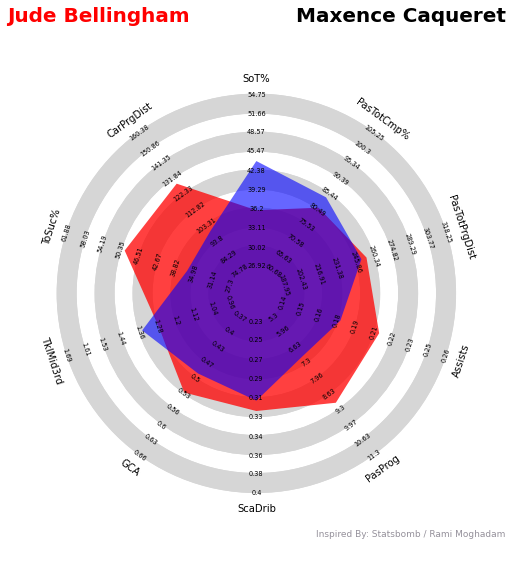

In [83]:
# build and plot radar graph
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges, params=params, values=values,
                         radar_color=['red', 'blue'],
                         alphas=[.75, .6],
                         title=title,
                         compare=True)